</bb> Prediction of solubiltiy using molecular descriptors and machine learning models </bb>

This notebook comes from the classroom in my computational chemistry class in the chemical engineering department. This is a simple version of how to predict the solubility of the compound using molecular descriptors.

We generate molecular descriptors using Rdkit and apply simple machine learning models such as PCA,PLS,and Random Forest to predict solubility. We also analyze the feature importance, to see which fragment contributes most to the prediction result.

In [ ]:
!pip install rdkit-pypi==2021.9.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.6 MB 1.4 MB/s 


In [ ]:
import rdkit

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import (
    MolecularDescriptorCalculator
)

In [ ]:
mols = [mol for mol in Chem.SDMolSupplier('solubility_2007.sdf.txt') if mol is not None]
print('load {} molecules'.format(len(mols)))

load 1708 molecules


In [ ]:

import pandas as pd
smiles = [Chem.MolToSmiles(mol) for mol in mols]
descriptors_names = [name for name,_ in Descriptors.descList]
calculator = MolecularDescriptorCalculator(descriptors_names)
X = pd.DataFrame(
    [calculator.CalcDescriptors(mol) for mol in mols],
    index=smiles,columns=descriptors_names
)

In [ ]:
X = X.loc[:,X.columns.str.startswith('fr_')]

In [ ]:
X = X.astype(np.float64)

In [ ]:
X.dropna(axis=1,inplace=True)
y = np.array([float(mol.GetProp('EXPT'))for mol in mols])

In [ ]:
y

array([-4.35, -3.33, -6.98, ..., -1.44, -4.86, -3.9 ])

### 課題２:可視化

In [ ]:
X

,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
Brc1cccc2ccccc12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N#Cc1cc(Br)c(O)c(Br)c1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brc1cc(Br)c(Br)cc1Br,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COP(=S)(OC)Oc1cc(Cl)c(Br)cc1Cl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CON(C)C(=O)Nc1ccc(Br)c(Cl)c1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCOC(=O)CC(SP(=S)(OC)OC)C(=O)OCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCSSCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
CSSC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCN(CC)C(=S)SSC(=S)N(CC)CC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#適当5行
X_fun = X[15:20]

In [ ]:
X_fun

,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
Clc1cccc(Br)c1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fc1cccc(Br)c1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brc1ccc(Br)cc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O=c1oc2ccccc2c(O)c1C(CC(O)c1ccc(-c2ccc(Br)cc2)cc1)c1ccccc1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cc1ccc(Br)cc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Clc1cccc(Br)c1の可視化

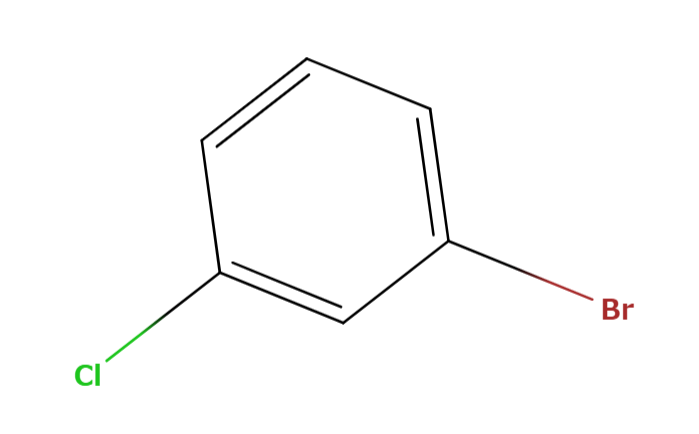

In [ ]:
X_fun.iloc[0][X_fun.iloc[0] >=1]

fr_benzene    1.0
fr_halogen    2.0
Name: Clc1cccc(Br)c1, dtype: float64

結果

fr_benzeneはベンゼン環に対応する

fr_halogenはハロゲン置換体に対応する

# Fc1cccc(Br)c1の可視化

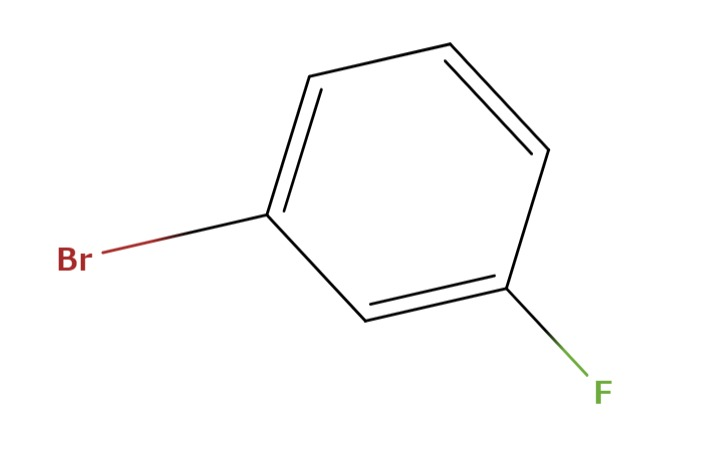

In [ ]:
X_fun.iloc[1][X_fun.iloc[1] >=1]

fr_benzene    1.0
fr_halogen    2.0
Name: Fc1cccc(Br)c1, dtype: float64

結果

fr_benzeneはベンゼン環に対応する

fr_halogenはハロゲン置換体に対応する

# Brc1ccc(Br)cc1の可視化

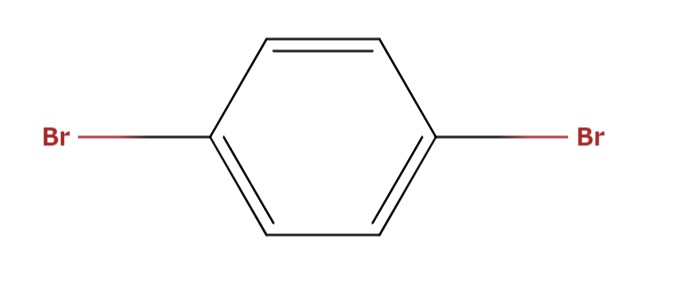

In [ ]:
X_fun.iloc[2][X_fun.iloc[2] >=1]

fr_benzene    1.0
fr_halogen    2.0
Name: Brc1ccc(Br)cc1, dtype: float64

結果

fr_benzeneはベンゼン環に対応する

fr_halogenはハロゲン置換体に対応する

# O=c1oc2ccccc2c(O)c1C(CC(O)c1ccc(-c2ccc(Br)cc2)cc1)c1ccccc1の可視化

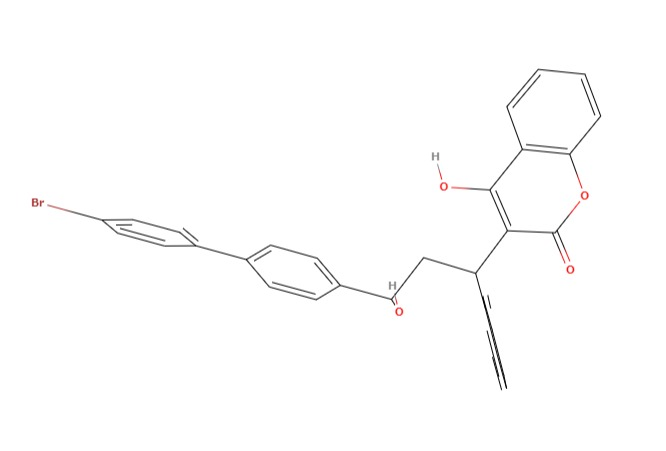

In [ ]:
X_fun.iloc[3][X_fun.iloc[3] >=1]

fr_Al_OH                 1.0
fr_Al_OH_noTert          1.0
fr_Ar_OH                 1.0
fr_benzene               4.0
fr_bicyclic              1.0
fr_halogen               1.0
fr_para_hydroxylation    1.0
Name: O=c1oc2ccccc2c(O)c1C(CC(O)c1ccc(-c2ccc(Br)cc2)cc1)c1ccccc1, dtype: float64

結果

fr_benzeneはベンゼン環に対応する

fr_halogenはハロゲン置換体に対応する

fr_AL_OHは脂肪族ヒドロキシル基に対応する

fr_Al_OH_noTertはtert-OHを除く脂肪族水酸基に対応する

fr_Ar_OHはヒドロキシル基に対応する

fr_bicyclicはbycyclic構造に対応する

fr_para_hydroxylationはパラヒドロキシル化部位(para-hydroxy)に対応する


#Cc1ccc(Br)cc1

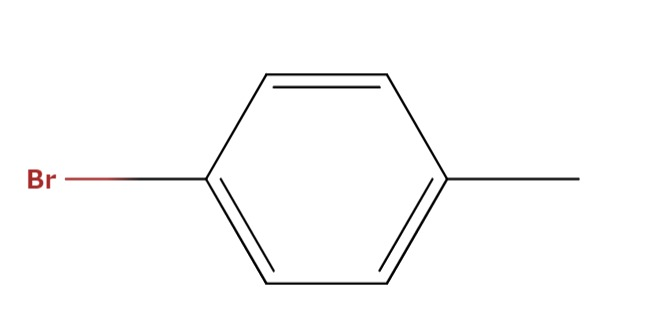

In [ ]:
X_fun.iloc[4][X_fun.iloc[4] >=1]

fr_aryl_methyl    1.0
fr_benzene        1.0
fr_halogen        1.0
Name: Cc1ccc(Br)cc1, dtype: float64

結果

fr_benzeneはベンゼン環に対応する

fr_halogenはハロゲン置換体に対応する

fr_aryl_methylはメチル基に対応する


### 課題3　train_test_split

In [ ]:
#train_test_split 80:20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### 課題4　StandardScalerを行う

In [ ]:
#StandardScalerを行う
from sklearn.preprocessing import StandardScaler
#normalization
scaler_X = StandardScaler()
scaler_y = StandardScaler()
scaler_X.fit(X_train)
scaler_y.fit(y_train.reshape(-1,1))

StandardScaler()

In [ ]:
X_train_scaled = scaler_X.transform(X_train)
y_train_scaled = scaler_y.transform(y_train.reshape(-1,1))
X_test_scaled = scaler_X.transform(X_test)

### 課題5　グリッドサーチによるハイパーパラメータチューニング

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

models = {
    'PLS': GridSearchCV(
        PLSRegression(),
        param_grid={
            'n_components':[ii for ii in range(1,61)]
        },
        cv=5
    ),
    'SVR':GridSearchCV(
        SVR(),
        param_grid={
            'gamma':[2**ii for ii in range(-5,5)],
            'C':[2**ii for ii in range(-5,5)],
            'epsilon':[2**ii for ii in range(-5,5)],
        },
        cv=5
    ),
    'RF': RandomForestRegressor(n_estimators=500)
}

#モデルの予測

In [ ]:
y_train_preds = {}
y_test_preds = {}
for name,model in models.items():
    model.fit(X_train_scaled,y_train_scaled.flatten())
    y_train_pred_scaled = model.predict(X_train_scaled)
    y_test_pred_scaled = model.predict(X_test_scaled)
    y_train_pred_scaled = y_train_pred_scaled.reshape(-1,1)
    y_test_pred_scaled = y_test_pred_scaled.reshape(-1,1)
    y_train_preds[name] = scaler_y.inverse_transform(y_train_pred_scaled)
    y_test_preds[name] = scaler_y.inverse_transform(y_test_pred_scaled)

    

    

#モデルの精度評価

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df = pd.DataFrame(
    index = ['PLS','SVR','RF'],
    columns = [
               'R2_train','MAE_train','RMSE_train',
               'R2_test','MAE_test','RMSE_test',
    ]
)
for name in ['PLS','SVR','RF']:
   y_train_pred = y_train_preds[name]
   y_test_pred = y_test_preds[name]
   df.loc[name,'R2_train'] = r2_score(y_train,y_train_pred)
   df.loc[name,'RMSE_train'] \
       = np.sqrt(mean_squared_error(y_train,y_train_pred))
   df.loc[name,'MAE_train'] \
       = np.sqrt(mean_absolute_error(y_train,y_train_pred))
   df.loc[name,'R2_test'] = r2_score(y_test,y_test_pred)
   df.loc[name,'RMSE_test'] \
       = np.sqrt(mean_squared_error(y_test,y_test_pred))
   df.loc[name,'MAE_test'] \
       = np.sqrt(mean_absolute_error(y_test,y_test_pred))
   

In [ ]:
df

,R2_train,MAE_train,RMSE_train,R2_test,MAE_test,RMSE_test
PLS,0.791864,0.852726,0.939105,0.790785,0.908435,1.021842
SVR,0.908571,0.664928,0.62242,0.86049,0.79951,0.834432
RF,0.934562,0.609505,0.52657,0.88262,0.76178,0.765393


### 課題8　実測値－予測値プロット

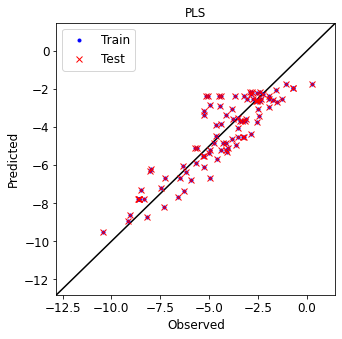

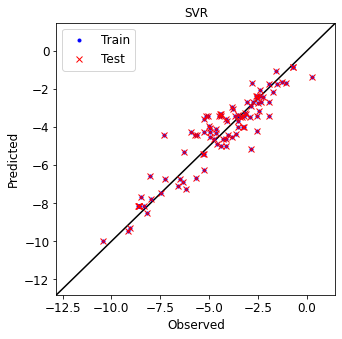

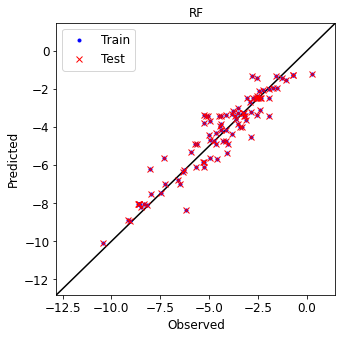

In [ ]:
import matplotlib.pyplot as plt
for name in ['PLS','SVR','RF']:
    y_train_pred = y_train_preds[name]
    y_test_pred = y_test_preds[name]
    min_val = min(min(y_train),min(y_train_pred),min(y_test),min(y_test_pred))
    max_val = max(max(y_train),max(y_train_pred),max(y_test),max(y_test_pred))
    margin = (max_val-min_val)*0.1
    xy_lim = [min_val-margin,max_val+margin]
    fig = plt.figure(figsize=[5,5])
    ax = fig.add_subplot(1,1,1)
    ax.plot(xy_lim,xy_lim,'k-')
    ax.plot(y_test,y_test_pred,'b.',label='Train')
    ax.plot(y_test,y_test_pred,'rx', label='Test')
    ax.set_xlim(xy_lim)
    ax.set_ylim(xy_lim)
    ax.set_xlabel('Observed',fontsize=12)
    ax.set_ylabel('Predicted',fontsize=12)
    ax.set_title(name,fontsize=12)
    ax.tick_params(labelsize=12)
    ax.legend(fontsize=12)
    fig.savefig('{}.png'.format(name))
plt.show()

### 課題9　説明変数の重要度の確認

In [ ]:
X.columns

Index(['fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO',
       'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O',
       'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1',
       'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2',
       'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate',
       'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine',
       'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur',
       'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo',
       'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan',
       'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole',
       'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone',
       'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy',
       'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom',
       'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr

molecular desciptors85個あるので、最も貢献度の高い5つの変数だけを選んで可視化することにします。

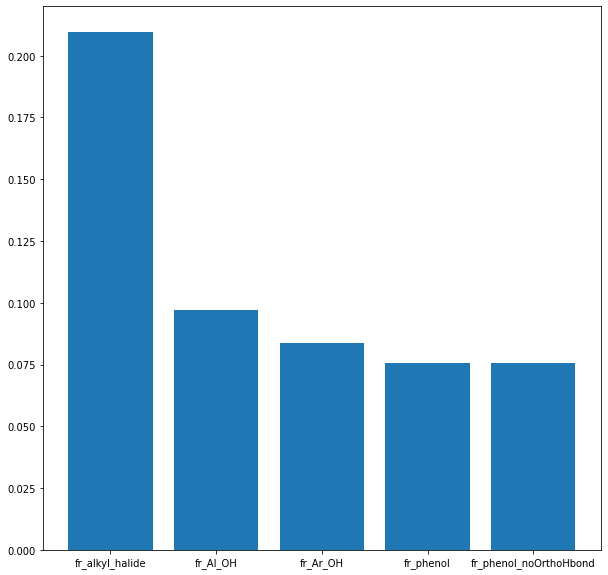

In [ ]:
#説明変数の重要度の確認

importance_PLS = pd.DataFrame(
    {
        'coef': models['PLS'].best_estimator_.coef_.flatten()
    },
    index = X.columns
)
importance_PLS.sort_values('coef',ascending=False,inplace=True)
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,1,1)
ax.bar(importance_PLS[0:5].index,importance_PLS[0:5]['coef'],)
fig.savefig('importance_PLS.png')
plt.show()


In [ ]:
importance_PLS[0:5]

,coef
fr_alkyl_halide,0.209511
fr_Al_OH,0.097013
fr_Ar_OH,0.083921
fr_phenol,0.075442
fr_phenol_noOrthoHbond,0.075442


# 重要な部分の構造 PLS
fr_alkyl_halide	
fr_para_hydroxylation	
fr_NH2	
fr_ArN	
fr_methoxy


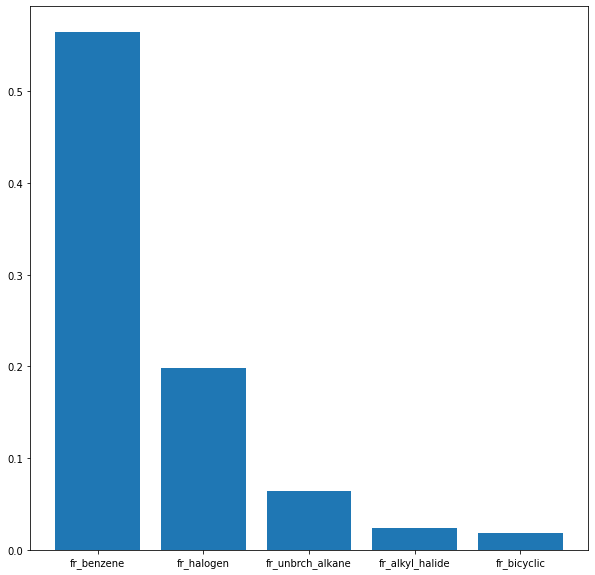

In [ ]:
#説明変数の重要度の確認

importance_RF = pd.DataFrame(
    {
        'feature_importances': models['RF'].feature_importances_
    },
    index = X.columns
)
importance_RF.sort_values('feature_importances',ascending=False,inplace=True)
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,1,1)
ax.bar(importance_RF[0:5].index,importance_RF[0:5]['feature_importances'],)
fig.savefig('importance_RF.png')
plt.show()


</b>重要な部分の構造 RF</b>
fr_benzenr

fr_halogen

fr_unbrch_alkene

fr_ArN

fr_methoxy